In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import tifffile as tiff
import cv2
import numpy as np
from csbdeep.utils import normalize
import sys
from pathlib import Path
from PIL import Image

sys.path.append(str(Path("..").resolve()))
from src import *

# Visualize Zenodo Dataset [Deprecated]

In [1]:
clean_path = "dataset/2_spine_GCaMP6f_115mWpower_944x432x6500_highSNR"
noisy_path = "dataset/2_spine_GCaMP6f_115mWpower_944x432x6500_lowSNR"
sample_dir = "dataset/sample"

In [21]:
# 21s
noisy_tiff = tiff.imread(noisy_path).astype(np.float32)
clean_tiff = tiff.imread(clean_path).astype(np.float32)

In [22]:
for i in [0, 100]:
    # np.save(open(f"{sample_dir}/noisy/{i}.npy", "wb"), noisy_tiff[i])
    np.save(open(f"{sample_dir}/clean/{i}.npy", "wb"), clean_tiff[i])

## BM3D denoising

In [3]:
from skimage import io, img_as_float
from skimage.metrics import peak_signal_noise_ratio
import bm3d
import cv2

The values must be ranged 0-1 because `sigma_psd` depends on it.

In [4]:
SAMPLE = 0

In [5]:
noisy = np.load(open(f"{sample_dir}/noisy/{SAMPLE}.npy", "rb"))
noisy /= np.max(noisy)
clean = np.load(open(f"{sample_dir}/clean/{SAMPLE}.npy", "rb"))
clean /= np.max(clean)

In [ ]:
# 18s
bm3D_all = bm3d.bm3d(noisy, sigma_psd=0.1, stage_arg=bm3d.BM3DStages.ALL_STAGES)
Image.fromarray(bm3D_all*255).convert("RGB").save(f"{sample_dir}/predicted/bm3D_all_{SAMPLE}.png")

In [ ]:
# 10s
bm3D_hard = bm3d.bm3d(noisy, sigma_psd=0.1, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
Image.fromarray(bm3D_hard*255).convert("RGB").save(f"{sample_dir}/predicted/bm3D_hard_{SAMPLE}.png")

In [14]:
bm3D_all = np.array(Image.open(f"{sample_dir}/predicted/bm3D_all_{SAMPLE}.png").convert("L"))
bm3D_hard = np.array(Image.open(f"{sample_dir}/predicted/bm3D_hard_{SAMPLE}.png").convert("L"))

In [29]:
peak_signal_noise_ratio((noisy*255).astype(np.uint), bm3D_all, data_range=255)

np.float64(22.00780457677454)

In [32]:
peak_signal_noise_ratio(bm3D_all, bm3D_hard, data_range=255)

np.float64(37.69413778075434)

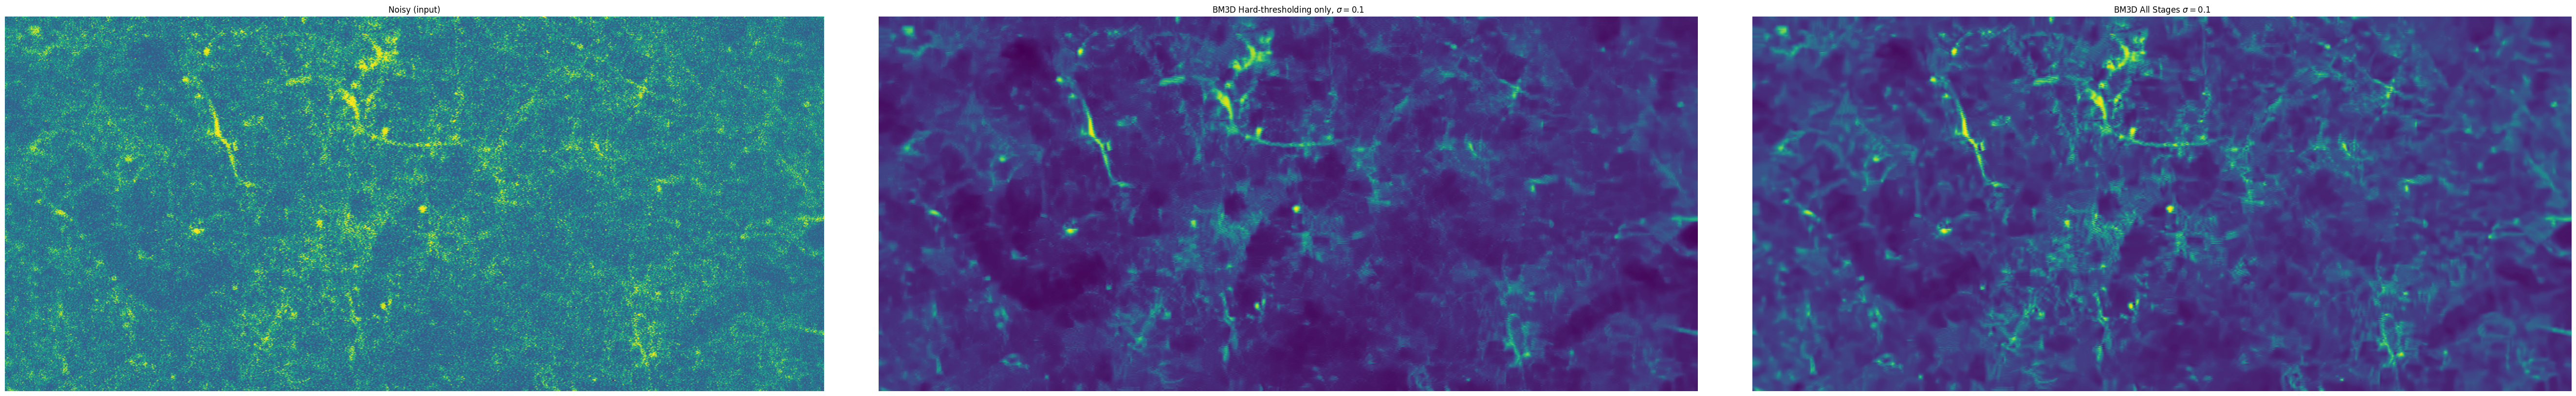

In [18]:
imshow(
    {
        "Noisy (input)": noisy,
        "BM3D Hard-thresholding only, $\sigma=0.1$": bm3D_hard,
        "BM3D All Stages $\sigma=0.1$": bm3D_all,
    },
    size=16,
    cols=3,
)